In [41]:
import pandas as pd

In [42]:
df = pd.read_csv('arxiv.csv')
df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,title,categories
0,704.0033,Convergence of the discrete dipole approximati...,"['physics', 'optics']"
1,704.0038,The discrete dipole approximation: an overview...,"['physics', 'optics']"
2,704.0479,The affine part of the Picard scheme,"['math', 'AG']"
3,704.1476,TeV-scale gravity in Horava-Witten theory on a...,['hep-th']
4,705.1155,State Vector Determination By A Single Trackin...,['astro-ph']


In [43]:
def preprocess_categories(cat):
    cat = cat.replace('[', '')
    cat = cat.replace(']', '')
    cat = cat.replace("'", '')
    return cat

In [44]:
from tqdm import tqdm

tqdm.pandas()
df['processed_categories'] = df['categories'].progress_apply(preprocess_categories)

100%|██████████| 401806/401806 [00:00<00:00, 688006.43it/s]


In [45]:
df['concat'] = df['title'] + ' ' + df['processed_categories']

In [46]:
df.concat[0]

'Convergence of the discrete dipole approximation. I. Theoretical\n  analysis physics, optics'

### relevance matrix using Annotated Suffix Tree

In [47]:
titles = list()
for i in df.concat:
    titles.append(i)

In [48]:
import re
import numpy as np
from east.asts import base


def clear_text(text, lowerize=True):
    pat = re.compile(r'[^A-Za-z0-9 \-\n\r.,;!?А-Яа-я]+')
    cleared_text = re.sub(pat, ' ', text)
    if lowerize:
        cleared_text = cleared_text.lower()
    tokens = cleared_text.split()
    return tokens


def make_substrings(tokens, k=4):
    for i in range(max(len(tokens) - k + 1, 1)):
        yield ' '.join(tokens[i:i + k])


def get_relevance_matrix(texts, strings):
    matrix = np.empty((0, len(strings)), float)
    prepared_text_tokens = [clear_text(t) for t in texts]
    prepared_string_tokens = [clear_text(s) for s in strings]
    prepared_strings = [' '.join(t) for t in prepared_string_tokens]
    for text_tokens in prepared_text_tokens:
        ast = base.AST.get_ast(list(make_substrings(text_tokens)))
        row = np.array([ast.score(s) for s in prepared_strings])
        matrix = np.append(matrix, [row], axis=0)
    return matrix


def save_matrix(matrix):
    np.savetxt("relevance_matrix.txt", matrix)

In [67]:
with open("taxonomy_leaves.txt") as f:
    strings = [l.strip() for l in f.readlines()]

In [35]:
relevance_matrix = get_relevance_matrix(titles, strings)

In [36]:
save_matrix(relevance_matrix)

### fuzzy thematic clusters using FADDIS

In [50]:
from operator import itemgetter
from PCM import cmeans

In [89]:
centers, U = cmeans(relevance_matrix.T, 6, 2)

In [75]:
np.savetxt("clusters.dat", U)

Обобщим 0-й полученный кластер с параметрами LIMIT = 0,12 (порог принадлежности к кластеру), GAMMA = 0,9, LAMBDA = 0,075. Мы будем использовать модуль pargenfs.py от GoT:

In [85]:
!python3 GOT/build/lib/got/taxonomies/pargenfs.py Data_Science_taxonomy.csv taxonomy_leaves.txt clusters.dat 0

Number of leaves: 351
All positive weights:
canonical correlation analysis                               0.21358
kernel-based clustering                                      0.20142
question answering                                           0.19617
clustering and classification                                0.19355
network data models                                          0.19225
business intelligence                                        0.17420
parallel computation                                         0.17164
bayesian analysis                                            0.16971
boosting                                                     0.16824
boosting                                                     0.16824
sparse pca                                                   0.15362
self organized map                                           0.13398
supervised learning by classification                        0.13337
ensembling                                                 

Обобщение кластера 0.

In [86]:
!python3 GOT/build/lib/got/taxonomies/visualize.py taxonomy_tree_lifted.ete

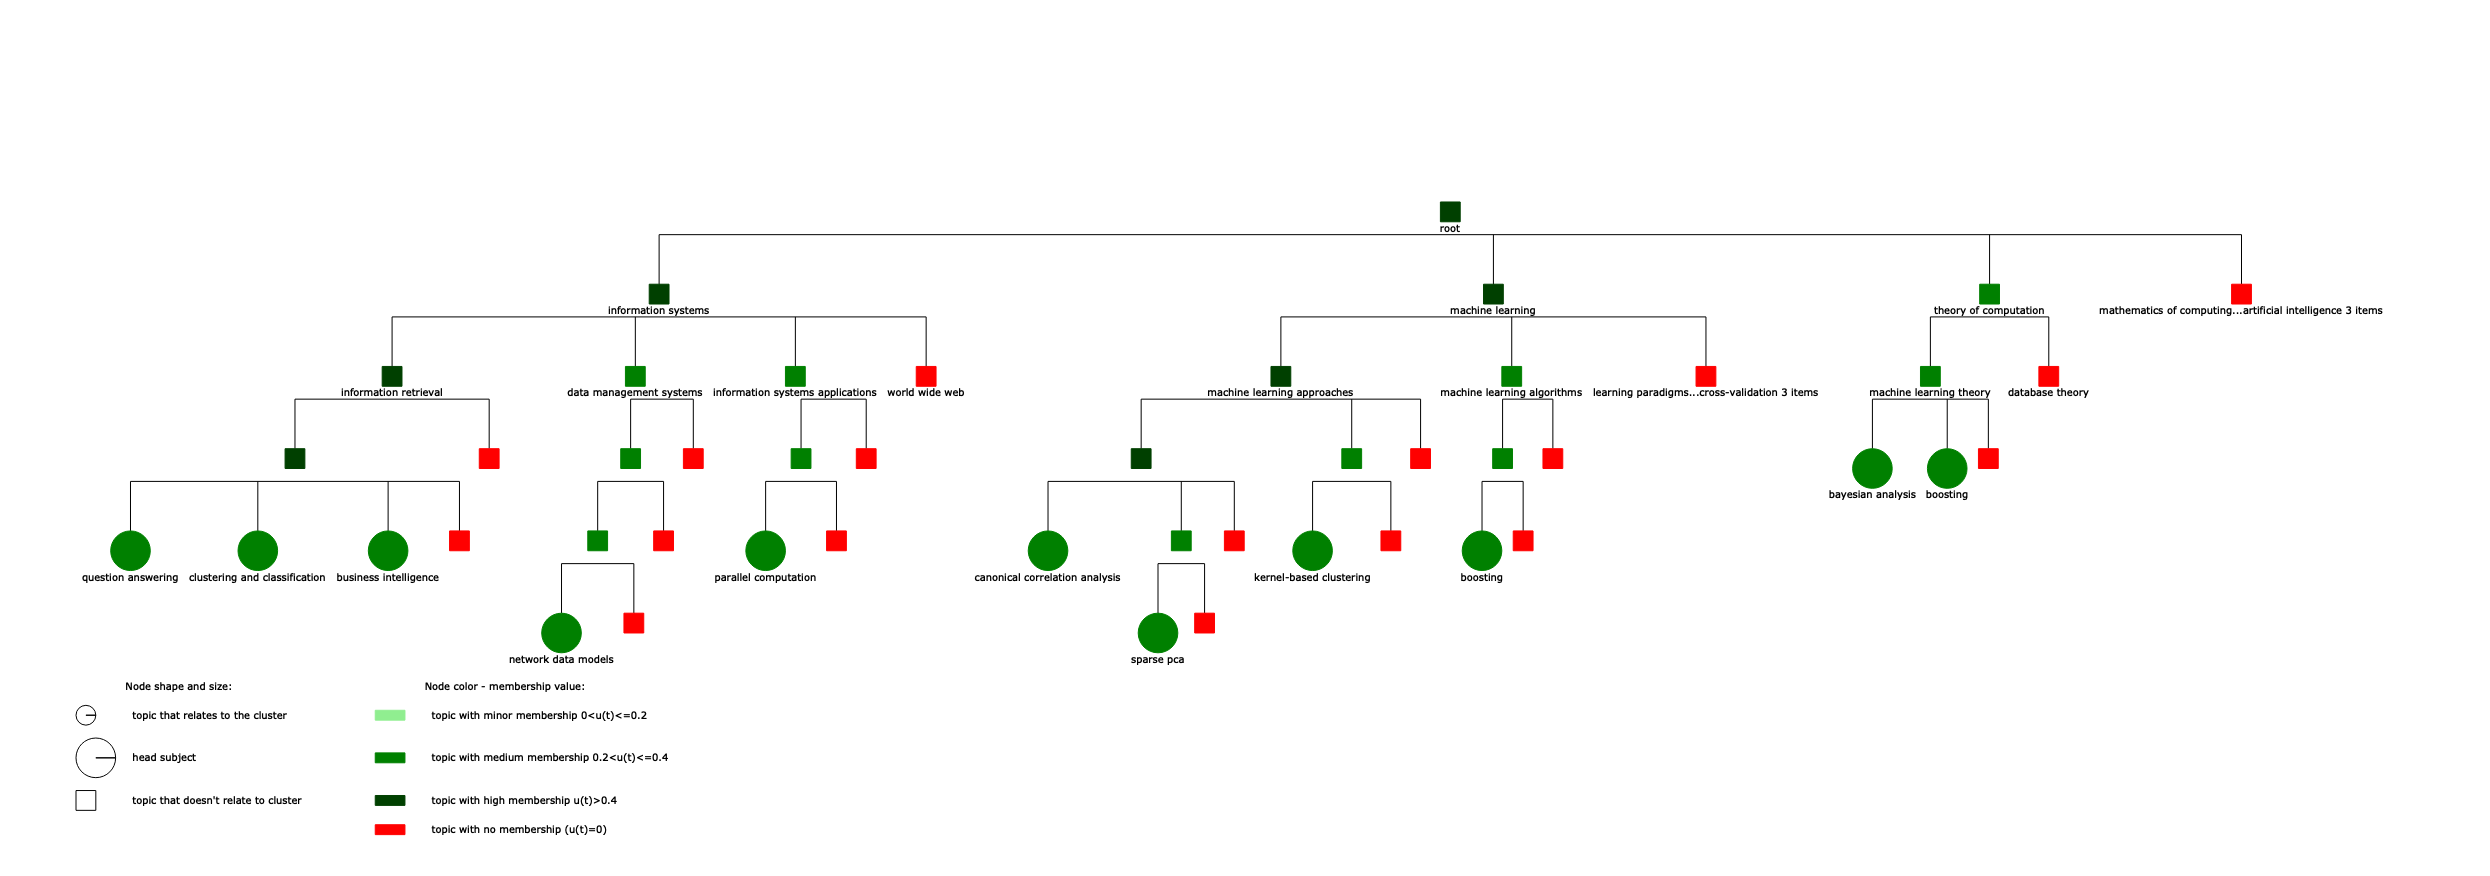

In [87]:
!python3 GOT/build/lib/got/taxonomies/pargenfs.py Data_Science_taxonomy.csv taxonomy_leaves.txt clusters.dat 1

Number of leaves: 351
All positive weights:
bagging                                                      0.22431
exploratory data analysis                                    0.21671
jackknifing                                                  0.21331
top-k retrieval in databases                                 0.21087
q-learning                                                   0.17885
desktop search                                               0.17587
triggers and rules                                           0.17176
types of association rules                                   0.17012
database query processing and optimization                   0.16026
treemaps                                                     0.15478
mediators and data integration                               0.14483
description logics                                           0.13480
bayesian networks                                            0.13435
distributed data locking                                   

Обобщение кластера 1.

In [88]:
!python3 GOT/build/lib/got/taxonomies/visualize.py taxonomy_tree_lifted.ete

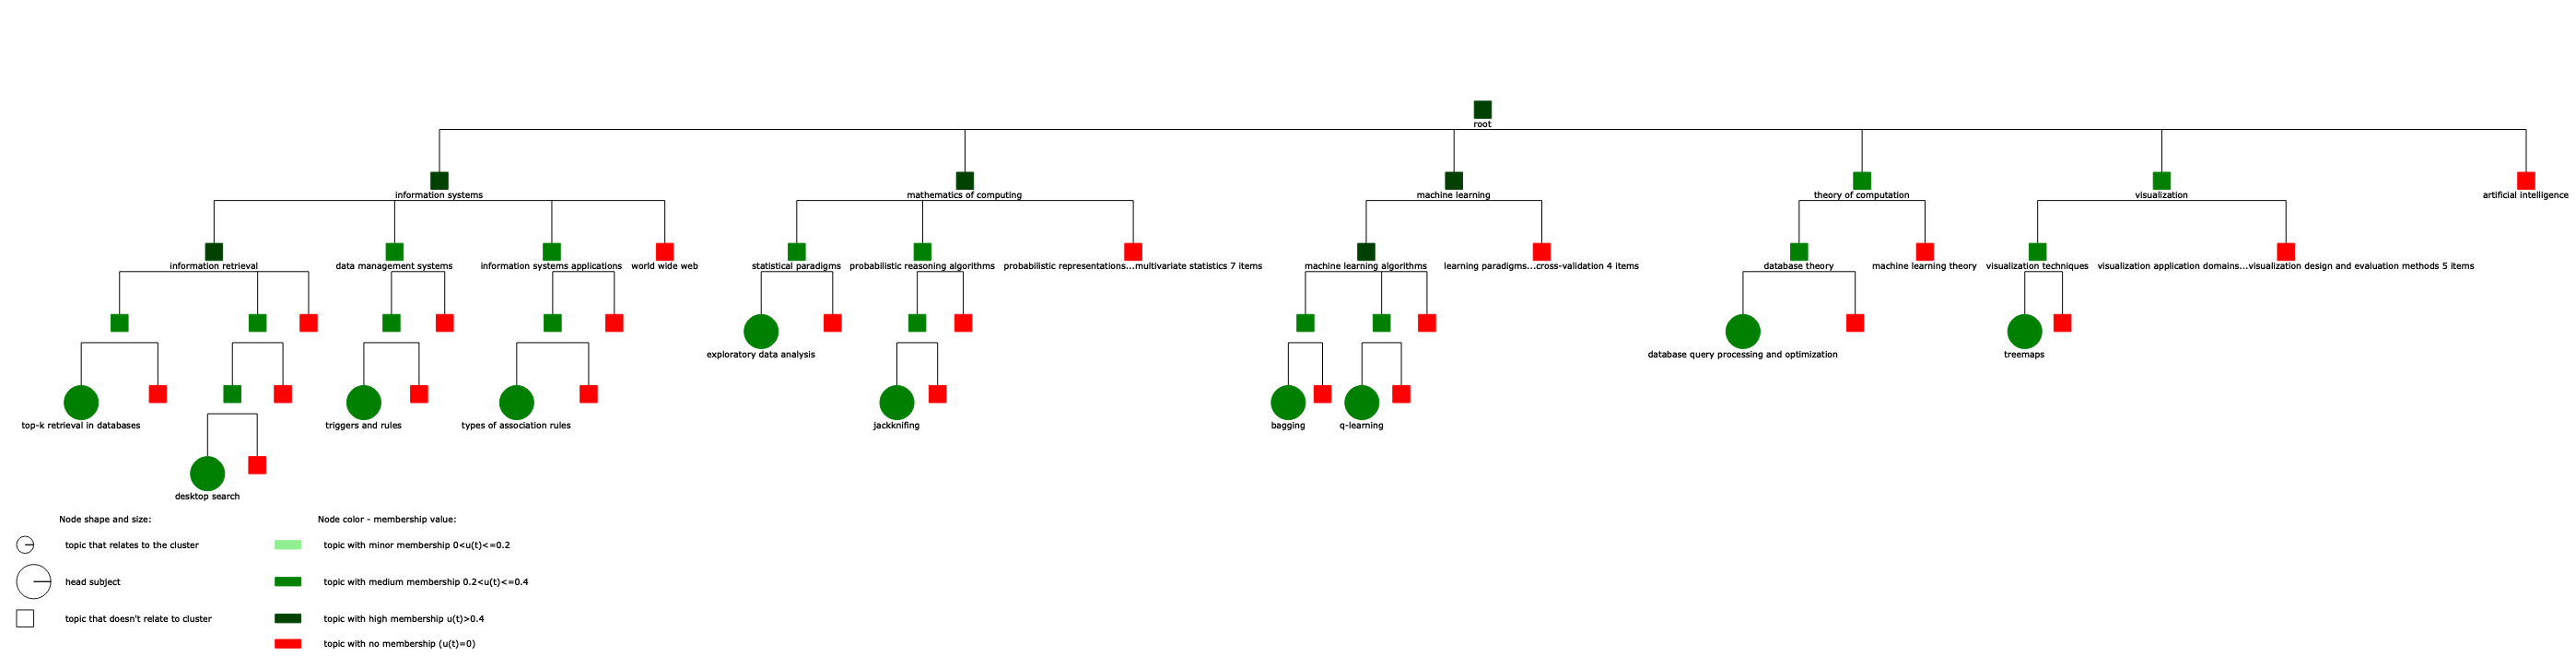

In [91]:
!python3 GOT/build/lib/got/taxonomies/pargenfs.py Data_Science_taxonomy.csv taxonomy_leaves.txt clusters.dat 2

Number of leaves: 351
All positive weights:
data scans                                                   0.22365
distribution functions                                       0.19788
machine translation                                          0.19205
statistical graphics                                         0.17889
markov networks                                              0.17597
massive data clustering                                      0.17002
adversarial learning                                         0.16571
adversarial learning                                         0.16571
time series analysis                                         0.15515
renewal theory                                               0.14440
bayesian analysis                                            0.14141
multiresolution                                              0.13700
cognitive robotics                                           0.13599
mediators and data integration                             

Обобщение кластера 2.

In [92]:
!python3 GOT/build/lib/got/taxonomies/visualize.py taxonomy_tree_lifted.ete

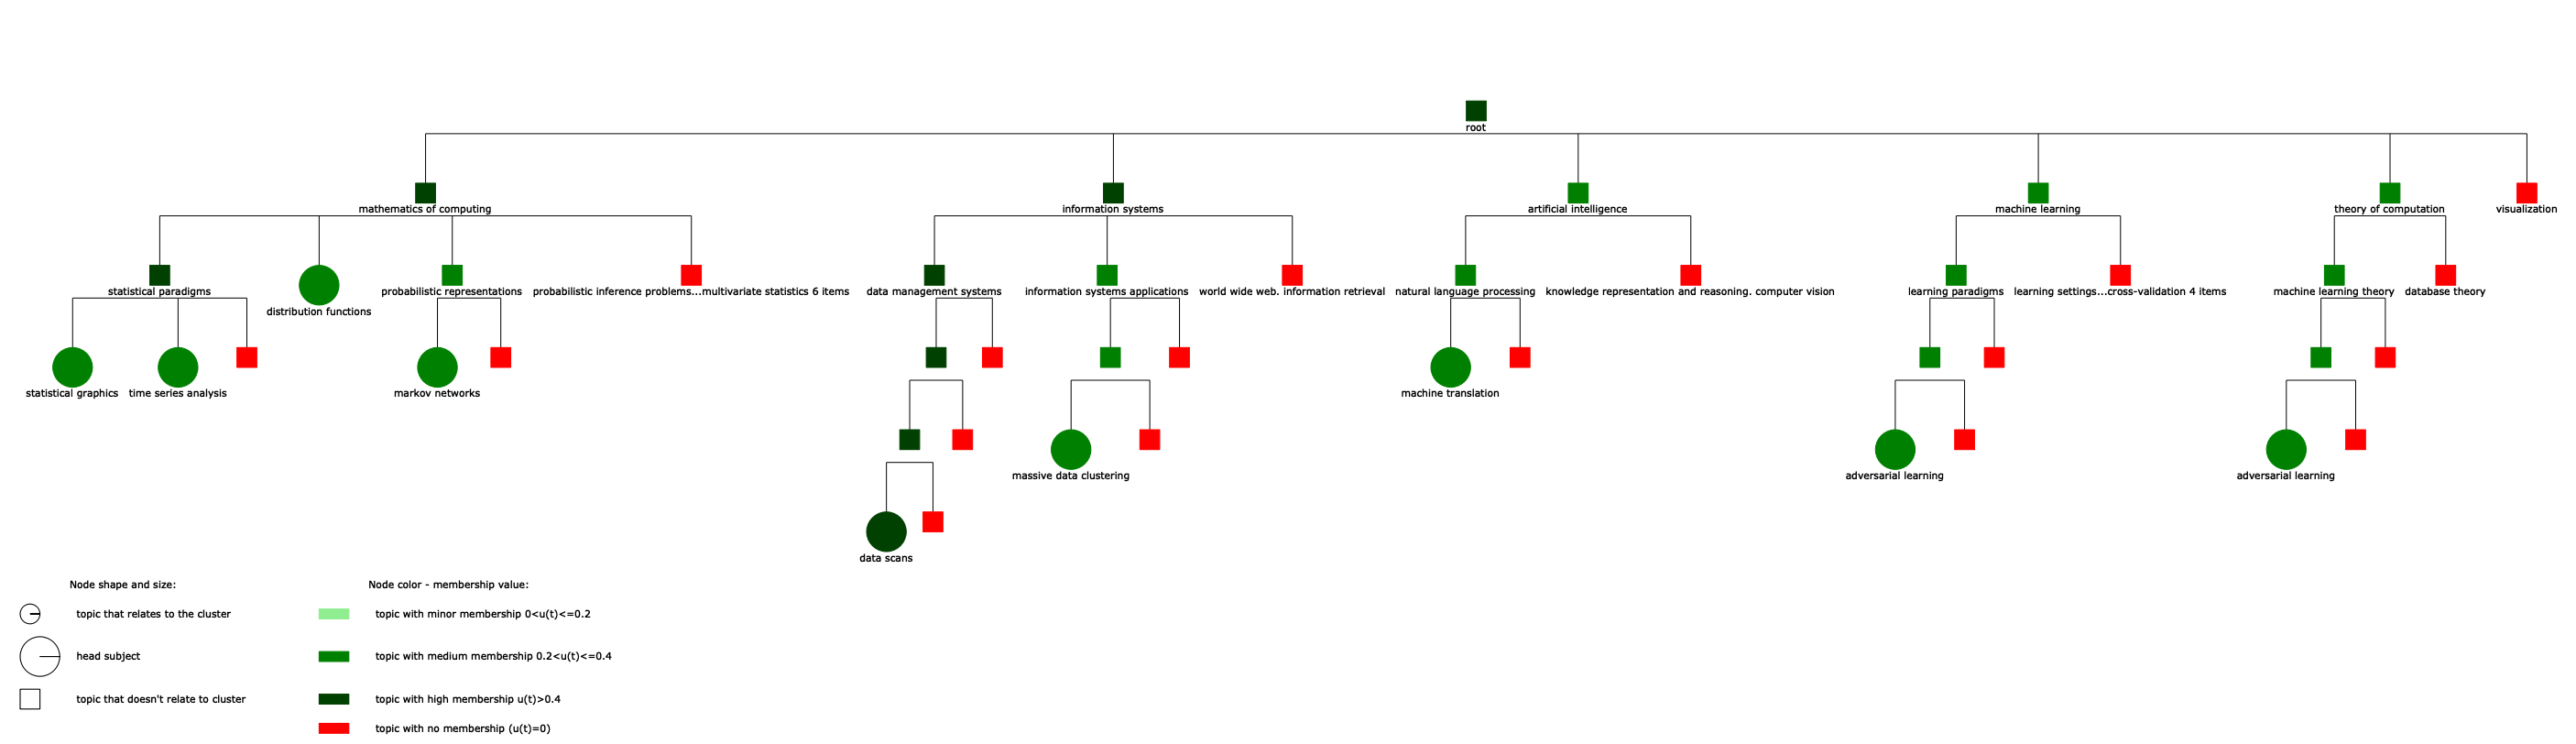

In [93]:
!python3 GOT/build/lib/got/taxonomies/pargenfs.py Data_Science_taxonomy.csv taxonomy_leaves.txt clusters.dat 3

Number of leaves: 351
All positive weights:
boosting                                                     0.24636
boosting                                                     0.24636
query representation                                         0.23382
data modeling                                                0.20699
motif discovery                                              0.16248
speech                                                       0.15619
ensembling                                                   0.15580
markov decision processes                                    0.15106
markov decision processes                                    0.15106
recommender systems                                          0.14433
learning from implicit feedback                              0.14153
data compression                                             0.13480
maximum likelihood modeling                                  0.13311
markov processes                                           

Обобщение кластера 3

In [94]:
!python3 GOT/build/lib/got/taxonomies/visualize.py taxonomy_tree_lifted.ete

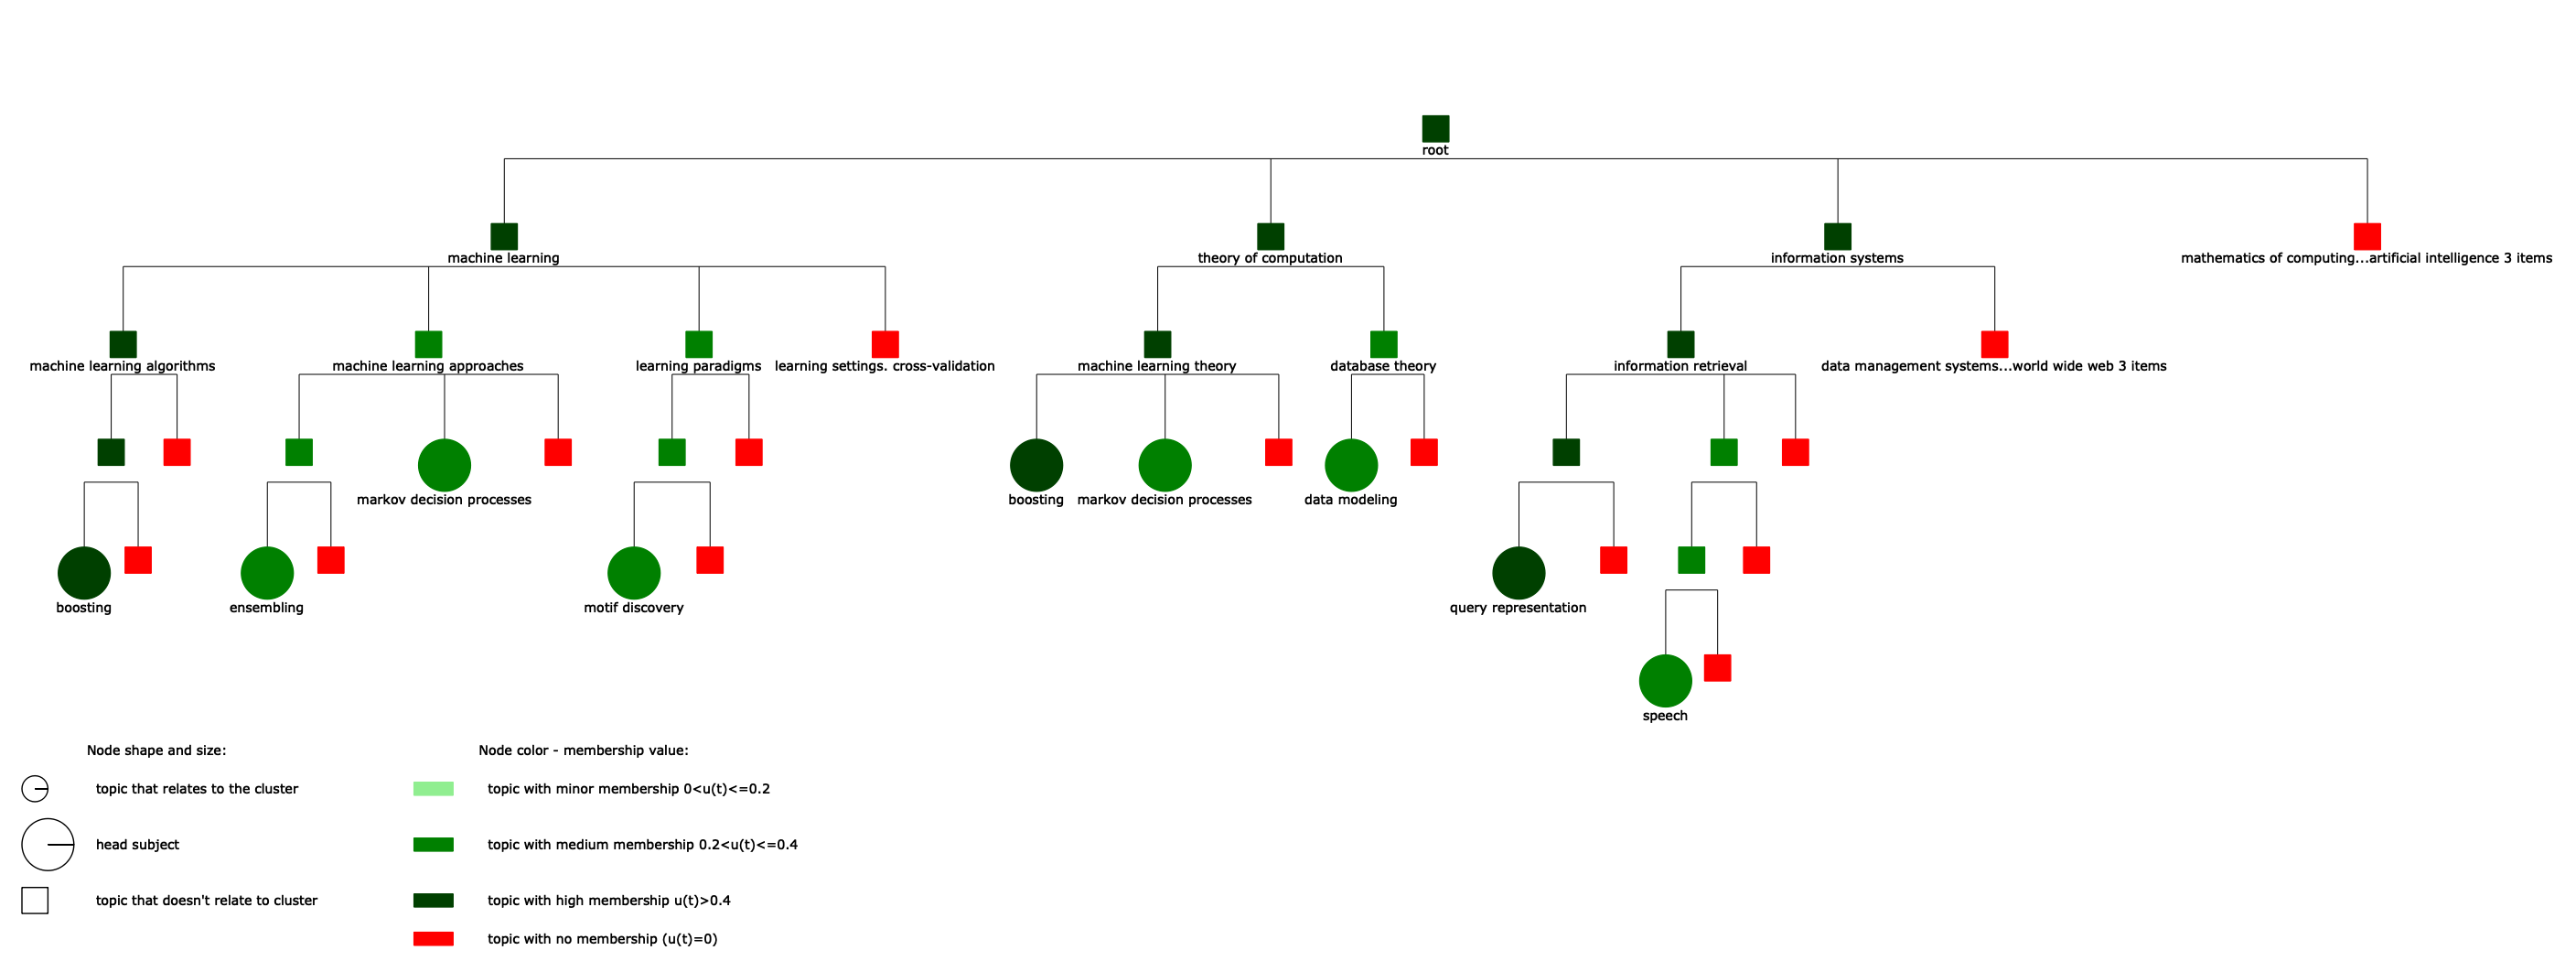

In [95]:
!python3 GOT/build/lib/got/taxonomies/pargenfs.py Data_Science_taxonomy.csv taxonomy_leaves.txt clusters.dat 4

Number of leaves: 351
All positive weights:
key-value stores                                             0.23006
latent dirichlet allocation                                  0.20896
transfer learning                                            0.20289
distribution functions                                       0.19349
relevance assessment                                         0.18222
integrity checking                                           0.16713
document structure                                           0.16157
critical nodes detection                                     0.15987
language models                                              0.15937
gibbs sampling                                               0.15669
database query processing and optimization                   0.14901
hyperbolic trees                                             0.14704
geographic visualization                                     0.14444
stream management                                          

Обобщение кластера 4

In [96]:
!python3 GOT/build/lib/got/taxonomies/visualize.py taxonomy_tree_lifted.ete

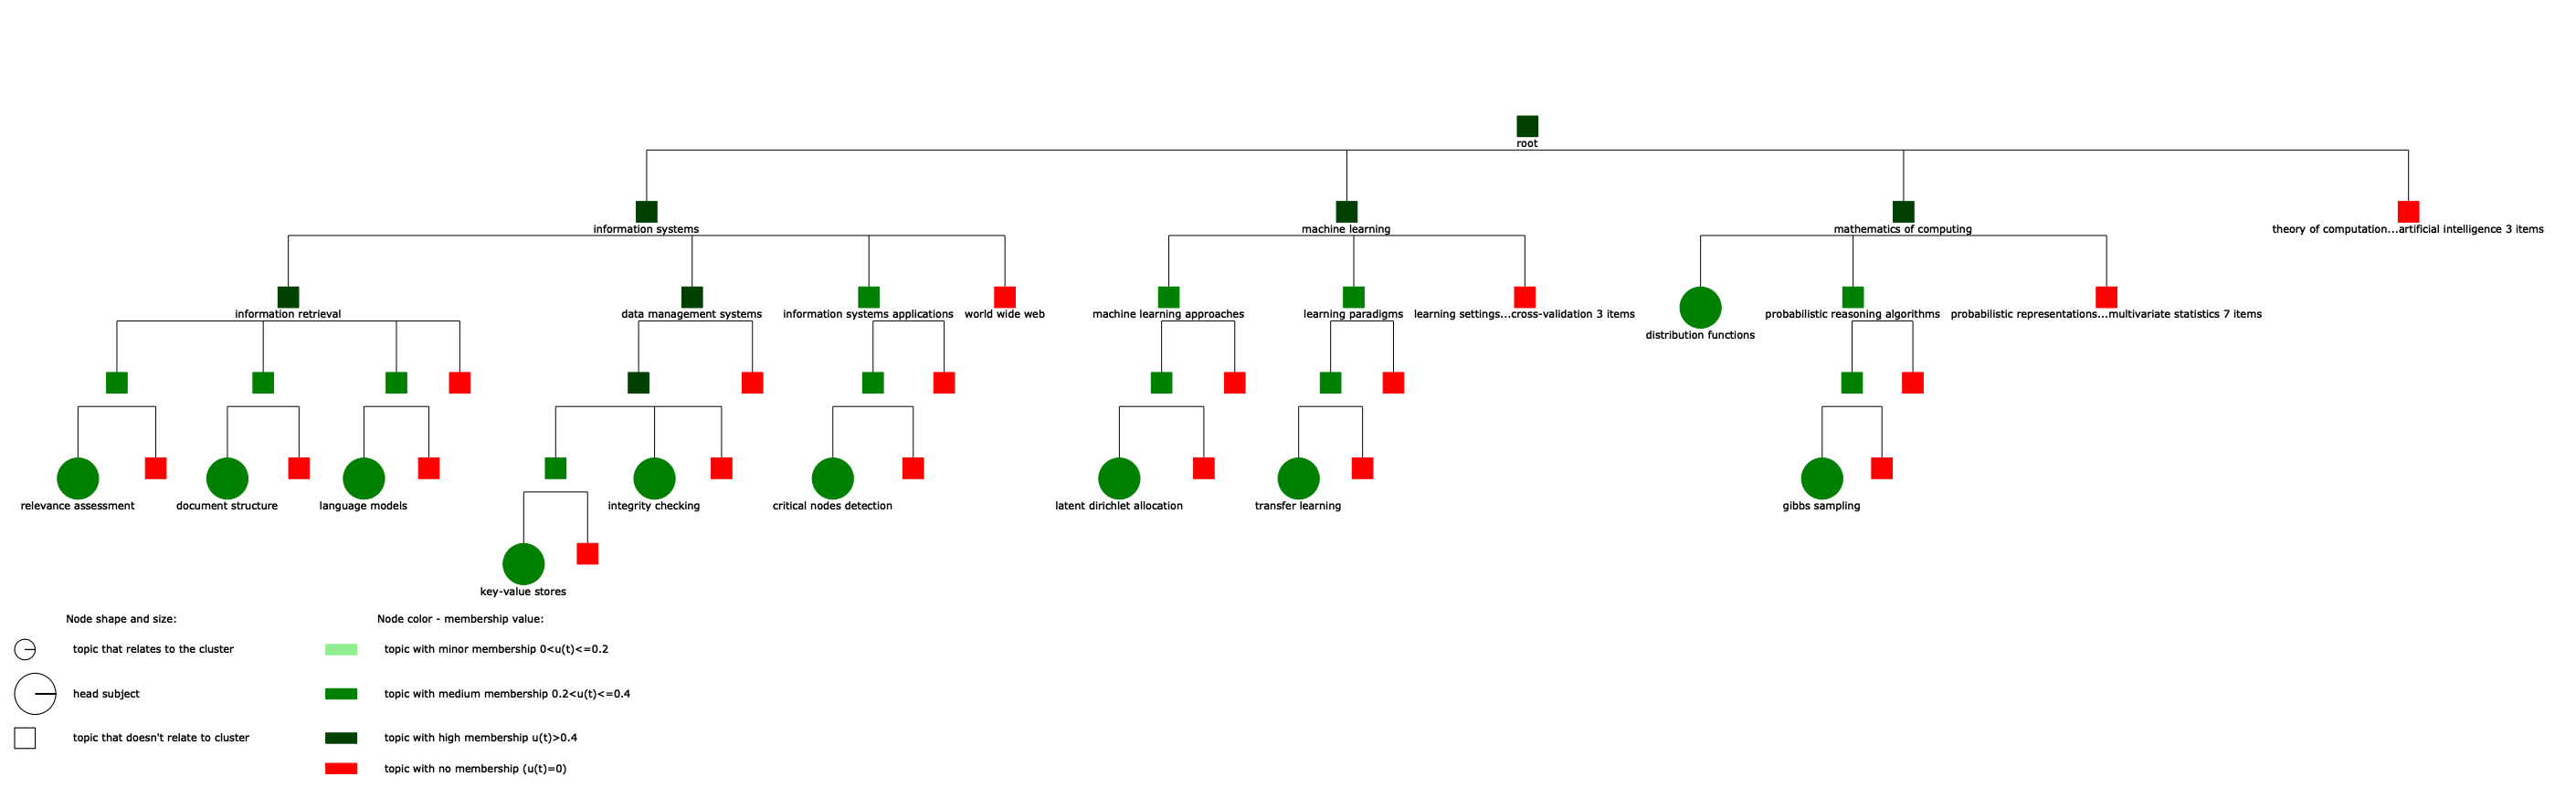

In [104]:
!python3 GOT/build/lib/got/taxonomies/pargenfs.py Data_Science_taxonomy.csv taxonomy_leaves.txt clusters.dat 5

Number of leaves: 351
All positive weights:
key-value stores                                             0.23006
latent dirichlet allocation                                  0.20896
transfer learning                                            0.20289
distribution functions                                       0.19349
relevance assessment                                         0.18222
integrity checking                                           0.16713
document structure                                           0.16157
critical nodes detection                                     0.15987
language models                                              0.15937
gibbs sampling                                               0.15669
database query processing and optimization                   0.14901
hyperbolic trees                                             0.14704
geographic visualization                                     0.14444
stream management                                          

ete representation saved in the file: taxonomy_tree_lifted.ete
ete representation saved.
Done.


Обобщение кластера 5

In [105]:
!python3 GOT/build/lib/got/taxonomies/visualize.py taxonomy_tree_lifted.ete

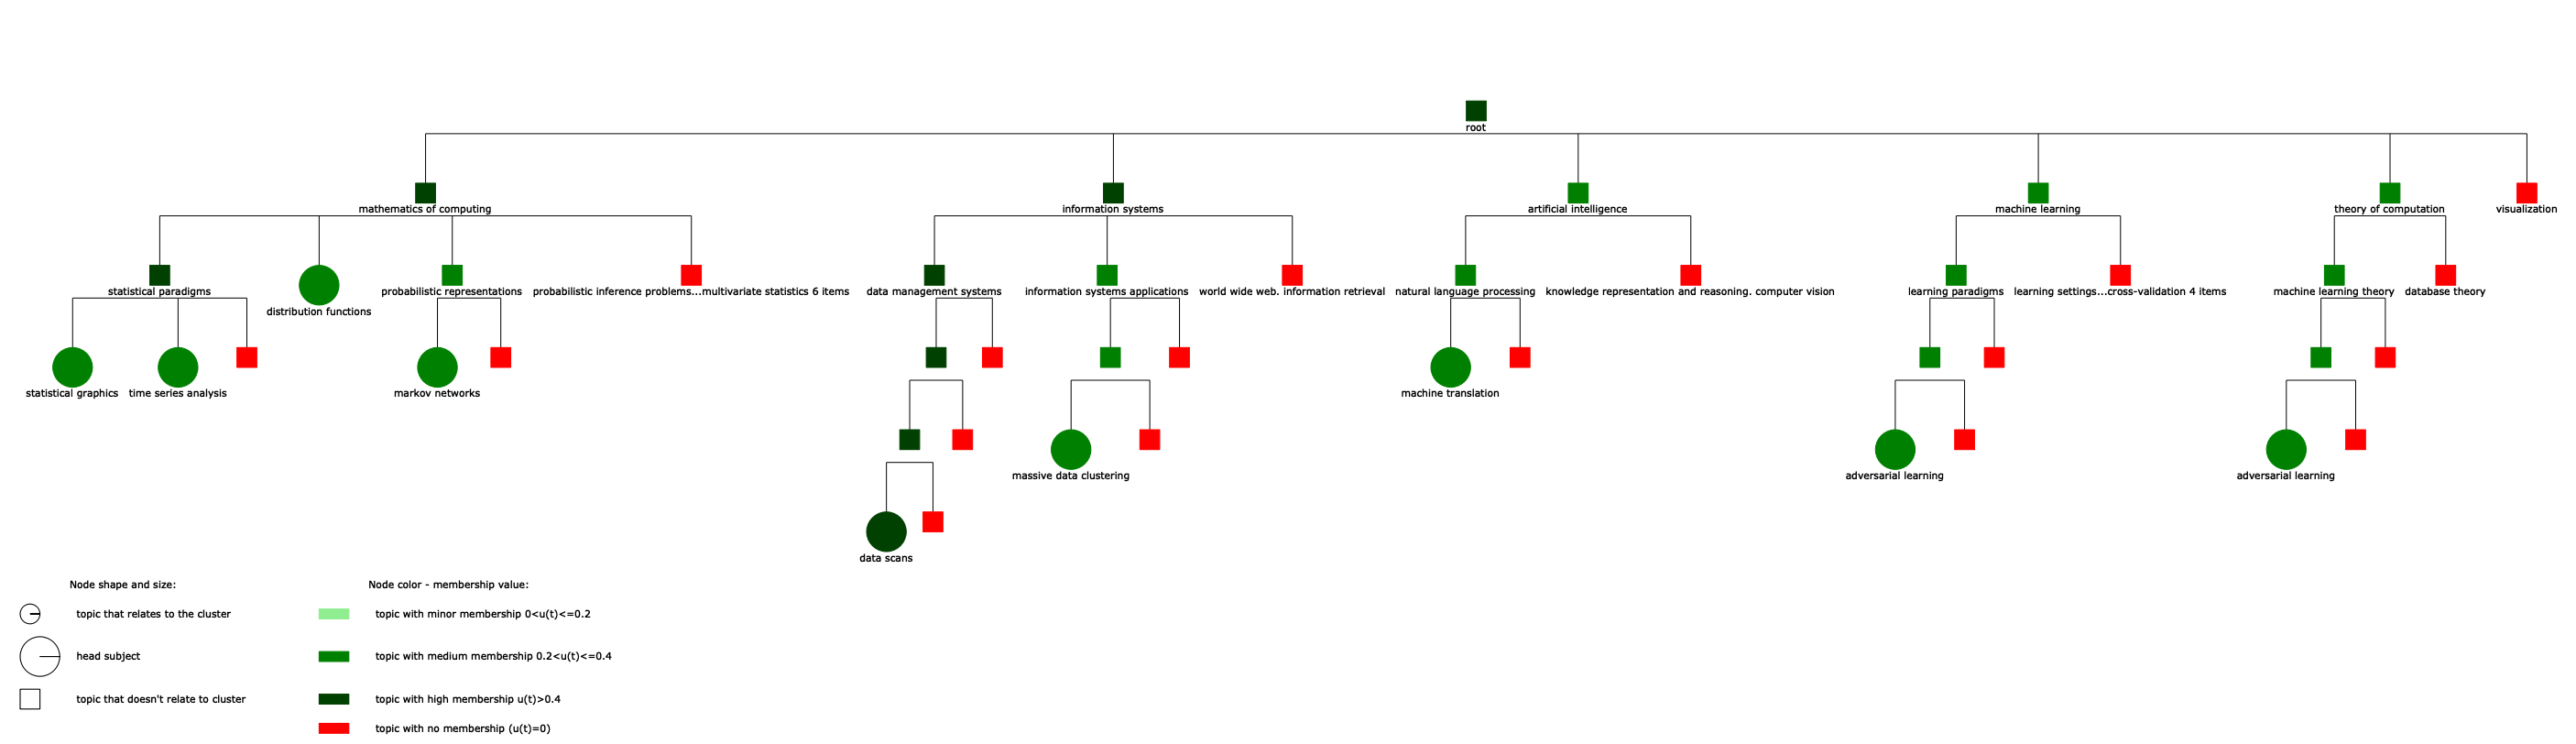

Проверка качества

In [109]:
from FuzzySilhouette import FuzzySilhouette

In [112]:
FuzzySilhouette(relevance_matrix, U, 6)

0.727362
